In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("../0_EDA_and_Data/1_Merged_Cleaned_With_ID.csv")

In [8]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,...,Latitude,Longitude,Product Name,Age,Gender,Marital Status,Income,Day,Month,Year
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Prestasi Utama,Prestasi,...,"-2,990934","104,756554",Crackers,36,0,Married,"10,53",1,1,2022
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,Prima Tendean,Prima,...,"-6,2","106,816666",Yoghurt,44,1,Married,"14,58",1,1,2022
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,Gita Ginara,Gita,...,"-6,966667","110,416664",Choco Bar,27,1,Single,"0,18",1,1,2022
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,Gita Ginara,Gita,...,"-6,966667","110,416664",Choco Bar,48,1,Married,"12,57",1,1,2022
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,Gita Ginara,Gita,...,"-6,966667","110,416664",Yoghurt,33,0,Married,"6,95",1,1,2022


In [209]:
df = df.groupby('CustomerID').agg({
    'TransactionID': 'count', #Berapa transaksi yang dilakukan
    'Qty': 'sum', #jumlah kuantitas barang yang dibeli
    'TotalAmount': 'sum', #jumlah pengeluaran
}).rename(columns={
    'TransactionID': 'TransactionID',
    'Qty': 'Qty',
    'TotalAmount': 'TotalAmount'
})

In [210]:
df

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


In [211]:
# Select numerical columns for clustering
numerical_cols = ['TransactionID', 'Qty', 'TotalAmount']
data = df[numerical_cols]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

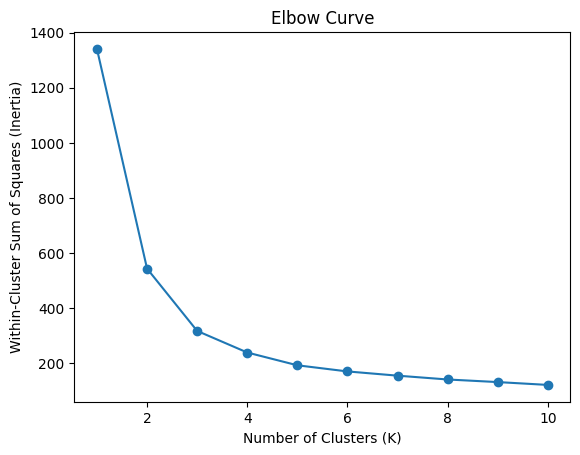

In [212]:
# Perform K-means clustering
max_k = 10  # maximum number of clusters to consider
inertia = []  # list to store the within-cluster sum of squares (inertia) for different K values

for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, max_k+1), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Curve')
plt.show()

In [213]:
model = KMeans(n_clusters=3, random_state=7) 
y_kmeans = model.fit_predict(df)
df['cluster'] = pd.DataFrame(y_kmeans)

In [214]:
df.loc[df['cluster'].isna(), 'cluster'] = 2

In [215]:
df.head()

,TransactionID,Qty,TotalAmount,cluster
CustomerID,,,,
1,17,60,623300,2.0
2,13,57,392300,2.0
3,15,56,446200,1.0
4,10,46,302500,1.0
5,7,27,268600,2.0


<AxesSubplot:>

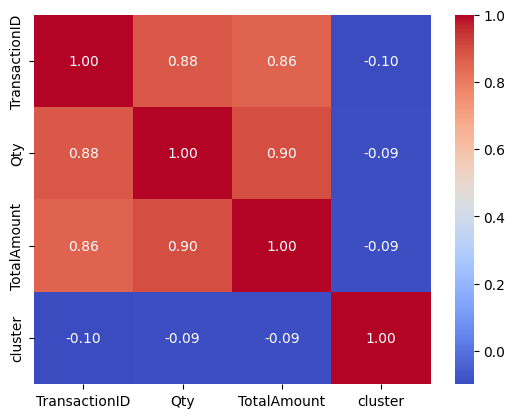

In [216]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

<AxesSubplot:title={'center':'Cluster Distribution'}>

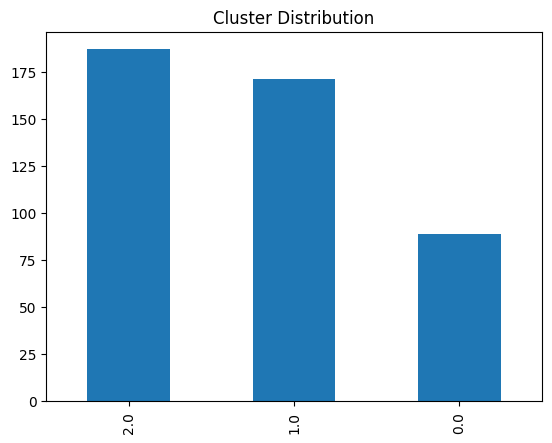

In [217]:
plt.title("Cluster Distribution")
df["cluster"].value_counts().plot(kind='bar')